In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yaml

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Read config

In [3]:
with open('../params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)

# Read Clean Data

In [4]:
clean_data_df = pd.read_csv('../' + config["featurize"]["clean_data"])

In [5]:
clean_data_df.shape

(85409, 9)

In [ ]:
clean_data_df.sample(5)

In [7]:
IP_ADDRESS_dummies = pd.get_dummies(clean_data_df['IP_ADDRESS'],drop_first=True)

In [8]:
clean_data_df = pd.concat([clean_data_df.drop('IP_ADDRESS', axis=1), IP_ADDRESS_dummies], axis=1)

In [9]:
PAIR_NAME_dummies = pd.get_dummies(clean_data_df['PAIR_NAME'], drop_first=True)

In [10]:
clean_data_df = pd.concat([clean_data_df.drop('PAIR_NAME', axis=1), PAIR_NAME_dummies], axis=1)

In [11]:
NAME_dummies = pd.get_dummies(clean_data_df['NAME'], drop_first=True)

In [12]:
clean_data_df = pd.concat([clean_data_df.drop('NAME', axis=1), NAME_dummies], axis=1)

# Data Split

In [13]:
X = clean_data_df.drop('VEHICLES' , axis=1)
y = clean_data_df['VEHICLES']

In [14]:
test_size = int(X.shape[0] *.20)

In [15]:
print(test_size)

17081


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size, random_state=42)

In [17]:
print (X_train.shape, y_train.shape)

(51247, 56) (51247,)


In [18]:
print (X_test.shape, y_test.shape)

(17081, 56) (17081,)


In [19]:
print (X_valid.shape, y_valid.shape)

(17081, 56) (17081,)


In [20]:
n_input = X_train.shape[1]

In [21]:
print(n_input)

56


# Base Neural Network Architecture

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, ReLU, Normalization, Flatten, CategoryEncoding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [24]:
# Define input layer
inputs = Input(shape=(n_input,), name='evi_input')

# Define normalization layer
normalized = Normalization()(inputs)

# Define dense layer
dense_1 = Dense(units=512, name='dense')(normalized)
relu_1 = ReLU(name='re_lu')(dense_1)

# Define another dense layer
dense_2 = Dense(units=1024, name='dense_1')(relu_1)
relu_2 = ReLU(name='re_lu_1')(dense_2)

# Define another dense layer
dense_3 = Dense(units=32, name='dense_2')(relu_2)
relu_3 = ReLU(name='re_lu_2')(dense_3)

# Define output layer for regression
regression_output = Dense(units=1, name='regression_head')(relu_3)

# Define the model
model = tf.keras.models.Model(inputs=inputs, outputs=regression_output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 evi_input (InputLayer)      [(None, 56)]              0         
                                                                 
 normalization (Normalizatio  (None, 56)               113       
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               29184     
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 re_lu_1 (ReLU)              (None, 1024)              0         
                                                             

In [25]:
history = model.fit(x=X_train, y=y_train.values,
                    validation_data=(X_valid, y_valid.values),
                    batch_size=128, epochs=600, verbose=2,
                    callbacks=[early_stop])

Epoch 1/600
401/401 - 4s - loss: 118655.6406 - val_loss: 71067.2656 - 4s/epoch - 11ms/step
Epoch 2/600
401/401 - 3s - loss: 63386.3477 - val_loss: 61065.8438 - 3s/epoch - 9ms/step
Epoch 3/600
401/401 - 3s - loss: 56079.0273 - val_loss: 57465.2148 - 3s/epoch - 8ms/step
Epoch 4/600
401/401 - 3s - loss: 51703.2422 - val_loss: 51690.1016 - 3s/epoch - 8ms/step
Epoch 5/600
401/401 - 3s - loss: 47402.9570 - val_loss: 48518.2031 - 3s/epoch - 8ms/step
Epoch 6/600
401/401 - 3s - loss: 44604.3789 - val_loss: 47767.3398 - 3s/epoch - 8ms/step
Epoch 7/600
401/401 - 3s - loss: 42882.6641 - val_loss: 43526.4219 - 3s/epoch - 8ms/step
Epoch 8/600
401/401 - 3s - loss: 42205.3555 - val_loss: 42782.8828 - 3s/epoch - 8ms/step
Epoch 9/600
401/401 - 3s - loss: 41148.8477 - val_loss: 44279.0352 - 3s/epoch - 8ms/step
Epoch 10/600
401/401 - 3s - loss: 40238.3516 - val_loss: 41745.2227 - 3s/epoch - 8ms/step
Epoch 11/600
401/401 - 3s - loss: 38933.8008 - val_loss: 42897.7812 - 3s/epoch - 8ms/step
Epoch 12/600
401/

401/401 - 3s - loss: 28470.7051 - val_loss: 29878.6094 - 3s/epoch - 8ms/step
Epoch 93/600
401/401 - 3s - loss: 28316.1172 - val_loss: 31176.3984 - 3s/epoch - 8ms/step
Epoch 94/600
401/401 - 3s - loss: 28353.3457 - val_loss: 33851.5820 - 3s/epoch - 8ms/step
Epoch 95/600
401/401 - 3s - loss: 28345.9570 - val_loss: 33259.7500 - 3s/epoch - 8ms/step
Epoch 96/600
401/401 - 3s - loss: 28059.9023 - val_loss: 36441.2383 - 3s/epoch - 8ms/step
Epoch 97/600
401/401 - 3s - loss: 28001.1562 - val_loss: 30472.3203 - 3s/epoch - 8ms/step
Epoch 98/600
401/401 - 3s - loss: 27793.9551 - val_loss: 31021.7188 - 3s/epoch - 8ms/step
Epoch 99/600
401/401 - 3s - loss: 27829.6133 - val_loss: 33067.5117 - 3s/epoch - 8ms/step
Epoch 100/600
401/401 - 3s - loss: 28173.1406 - val_loss: 29992.1562 - 3s/epoch - 8ms/step
Epoch 101/600
401/401 - 3s - loss: 27512.4551 - val_loss: 30849.6855 - 3s/epoch - 8ms/step
Epoch 102/600
401/401 - 3s - loss: 27581.9453 - val_loss: 32382.2051 - 3s/epoch - 8ms/step
Epoch 103/600
401/40

## Plot the learning curves

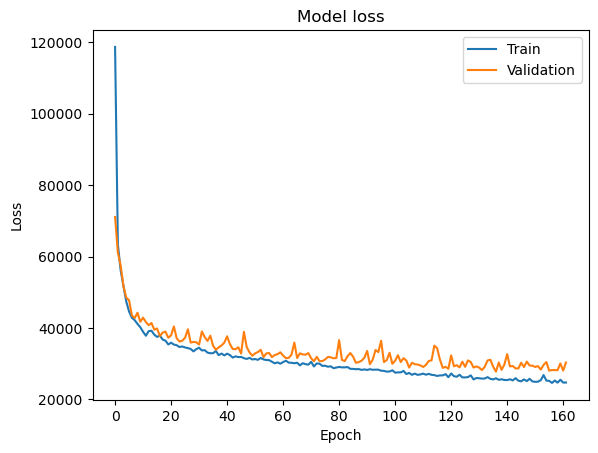

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Evaluation and Prediction

In [27]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test.values)

534/534 [==============================] - 2s 4ms/step - loss: 27827.6211


27827.62109375

In [28]:
predictions = model.predict(X_test)

534/534 [==============================] - 2s 3ms/step


In [29]:
np.sqrt(mean_squared_error(y_test, predictions))

166.81613480883772

In [30]:
clean_data_df['VEHICLES'].mean()

411.6113875586882

In [31]:
clean_data_df['VEHICLES'].median()

255.0